In [1]:
import pandas as pd

In [54]:
symbol = 'spx'

In [55]:
data = pd.read_pickle('data/stocktwits/datasets_clean/' + symbol + '_twits_012018_072019_clean.pickle')

In [56]:
len(data)

186473

In [57]:
data = data.dropna()

In [58]:
data.index = data.created_at

In [59]:
data = data.tz_convert('America/New_York')

In [60]:
data = data[data.index > pd.to_datetime('2018-07-01 04:00:00+00:00').tz_convert('America/New_York')]

In [61]:
data['pos'] = (data.sentiment_declared == 'Bullish') + 0
data['neg'] = (data.sentiment_declared == 'Bearish') + 0

In [62]:
data = data[['pos', 'neg']].groupby(data.index.date).sum()

In [63]:
price = pd.read_csv('data/prices/' + symbol + '_prices.csv', header=None, index_col=0)

In [64]:
price.index = pd.to_datetime(price.index)

In [65]:
len(price)

272

In [66]:
data = data.join(price, how='inner')

In [67]:
len(data)

272

In [68]:
data[['pos', 'neg']].to_csv('data/pos_neg/posneg_stck_' + symbol + '_decl.csv')

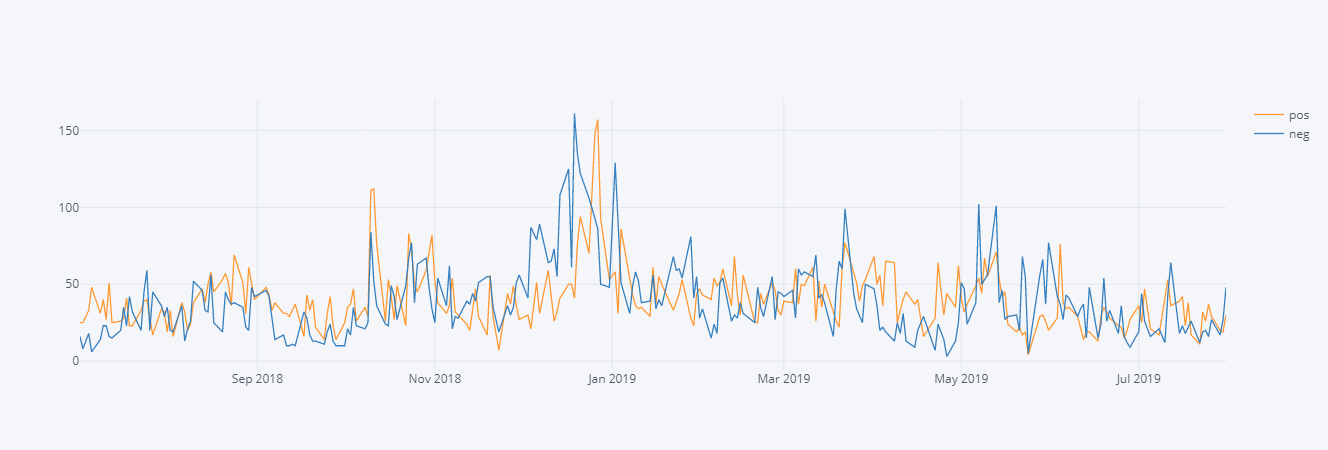

In [69]:
data[['pos', 'neg']].iplot()